In [1]:
%matplotlib inline
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)

pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
import datetime



from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from random import randint

import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = False

print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: False
Done loading packages


In [2]:
# Data from https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
df_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [3]:
list_of_countrys = df_cases["Country/Region"].unique()
list_of_countrys

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [30]:
# Choose country and or province

loc = "Australia"
#Make it find the list of possible provinces.
province = "Greenland"
del province # Comment out to select for province

df_cases_loc = df_cases.loc[df_cases["Country/Region"] == loc]
df_recovered_loc = df_recovered.loc[df_recovered["Country/Region"] == loc]
df_deaths_loc = df_deaths.loc[df_deaths["Country/Region"] == loc]



if 'province' in locals():
    df_cases_loc = df_cases.loc[df_cases_loc["Province/State"] == province]
    df_recovered_loc = df_recovered_loc[df_recovered_loc["Province/State"] == province]
    df_deaths_loc = df_deaths_loc[df_deaths_loc["Province/State"] == province]
    
else:
    #If no province is found, sum all provinces together to get country wide numbers
            ##### Following is old working but wrong. need fix as above.
            # Drops non NaN here. NaN is for primary Country, for regions select region name instead of NaN
                #     df_cases_loc = df_cases_loc[df_cases_loc['Province/State'].isnull()]
                #     df_recovered_loc = df_recovered_loc[df_recovered_loc['Province/State'].isnull()]
                #     df_deaths_loc = df_deaths_loc[df_deaths_loc['Province/State'].isnull()]

#Transposes and selects only date rows
dic_loc = {"cases": df_cases_loc.transpose()[4:],
          "recovered": df_recovered_loc.transpose()[4:],
          "deaths": df_deaths_loc.transpose()[4:]}

In [31]:
#Makes dates from columnames.
dates_d = list(df_deaths_loc.columns.values.tolist())
dates_d = dates_d[4:]
dates_d = pd.to_datetime(dates_d,format='%m/%d/%y')

dates_r = list(df_recovered_loc.columns.values.tolist())
dates_r = dates_r[4:]
dates_r = pd.to_datetime(dates_r,format='%m/%d/%y')

dates_c = list(df_cases_loc.columns.values.tolist())
dates_c = dates_c[4:]
dates_c = pd.to_datetime(dates_c,format='%m/%d/%y')

In [32]:
# Test if dates are the same for future ease of plotting

def dates_test(test_list1, test_list2, test_list3):
    dates_dif = test_list1-test_list2
    dates_dif = set(dates_dif)
    if len(dates_dif) == 1:
        dates_dif_1 = True
    else:
        dates_dif_1 = False
        
    dates_dif = test_list1-test_list3
    dates_dif = set(dates_dif)
    if len(dates_dif) == 1:
        dates_dif_2 = True
    else:
        dates_dif_2 = False
    if dates_dif_1 * dates_dif_2 == 1:
        return "Dates match"
    else:
        return "Dates does not match"
    return 

dates_test(dates_d,dates_r,dates_c)

'Dates match'

In [33]:
df_cases_loc = df_cases.loc[df_cases["Country/Region"] == loc]
df_cases_loc

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22
9,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,114564,115688,116905,117882,118728,119548,120638,121713,122718,123655
10,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2395359,2407720,2419692,2430624,2439636,2447877,2458811,2471023,2481957,2492007
11,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,66760,66771,67094,67659,67659,68139,68481,68830,68824,69386
12,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1060169,1067417,1071750,1080068,1084861,1089495,1110497,1117569,1123991,1130211
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,444522,449227,449227,453773,457676,464841,468607,472745,477237,481125
14,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,146212,147252,148367,149292,150105,150983,152192,153361,154437,155385
15,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1673533,1687747,1700795,1712856,1722934,1734295,1747754,1761974,1774979,1787427
16,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,490899,507544,523052,536214,548467,560662,576315,592541,609598,624774


In [29]:
#Create conviniant dataframe for plotting
df_loc = pd.concat([dic_loc["cases"], dic_loc["recovered"]], axis=1)
df_loc = pd.concat([df_loc, dic_loc["deaths"]], axis=1)
df_loc.columns = ['cases', 'recovered', 'deaths']

Text(0.5, 1.0, 'Denmark Deaths, Revocered and Deaths \n from January 2020 to April 2022')

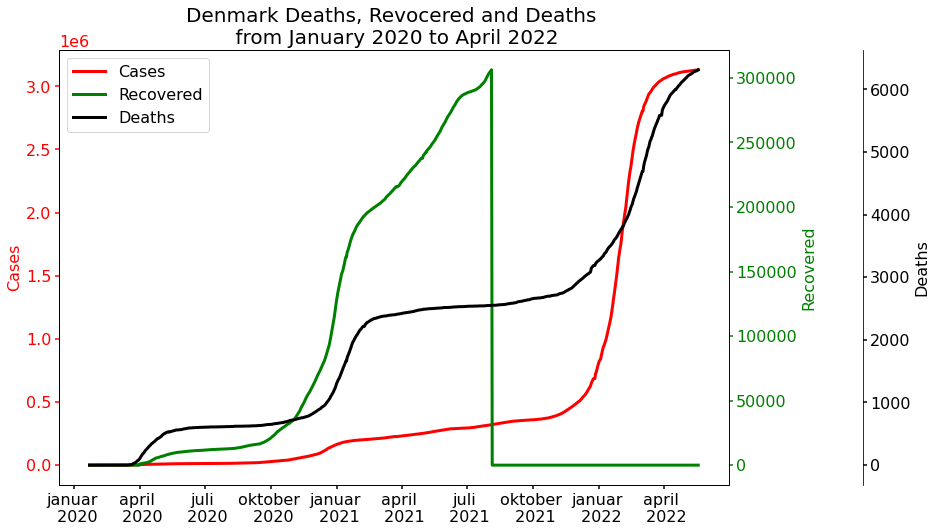

In [15]:
fig, ax = plt.subplots()

twin1 = ax.twinx()
twin2 = ax.twinx()

twin2.spines.right.set_position(("axes", 1.2))

# ax.plot(dates_d,df_loc["cases"],color="r")
# ax1.plot(dates_d,df_loc["recovered"],color="g")
# ax2.plot(dates_d,df_loc["deaths"],color="k")

# ax.yaxis.label.set_color("r")
# ax1.yaxis.label.set_color("g")
# ax2.yaxis.label.set_color("k")

# tkw = dict(size=4, width=1.5)
# ax.tick_params(axis='y', colors="r", **tkw)
# ax1.tick_params(axis='y', colors="g", **tkw)
# ax2.tick_params(axis='y', colors="k", **tkw)


p1, = ax.plot(dates_d,df_loc["cases"],color="r", label="Cases")
p2, = twin1.plot(dates_d,df_loc["recovered"],color="g", label="Recovered")
p3, = twin2.plot(dates_d,df_loc["deaths"],color="k", label="Deaths")

ax.set_ylabel(p1.get_label())
twin1.set_ylabel(p2.get_label())
twin2.set_ylabel(p3.get_label())

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)

ax.legend(handles=[p1, p2, p3])

monthyearFmt = mdates.DateFormatter('%B \n %Y')
ax.tick_params(axis='x', **tkw)
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_title(f'{loc} Deaths, Revocered and Deaths \n from January 2020 to April 2022')
